In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

names_bw=['time', 'bw', 'op1', 'size', 'op2' ]
names_latency=['time', 'latency', 'op2', 'write_size', 'op3']

/tmp/ipykernel_87469/3168358370.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438 24542.75664438
 24542.75664438 24542.75664438 24542.75664438]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms


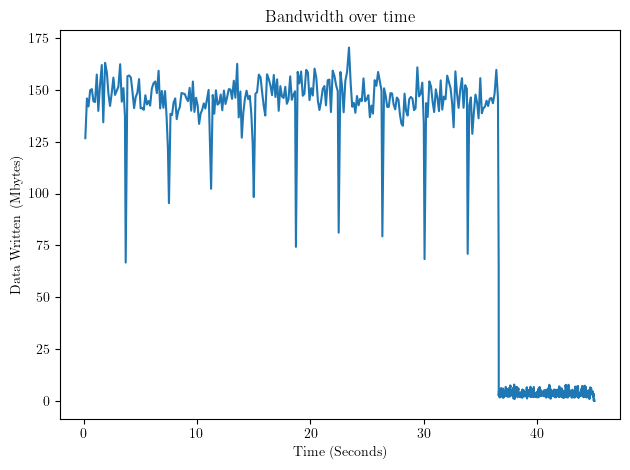

In [63]:
# Define a custom grouping function
def custom_grouping(index):
    return index // 1000
    
names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['submission_time', 'duration', 'write_size']
dirs = ["25Util", "50Util", "90Util"]
runs = ["run2", "run1"]
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/25Util/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['submission_time'] = df['submission_time'] - df.iloc[0].submission_time
df['duration'] = df['duration']/1e6 #convert ns to ms
df['completion_time'] = df['submission_time'] + df['duration']
# Step 2: Convert submission time and completion time columns to datetime objects with unit as milliseconds
df['submission_time'] = pd.to_datetime(df['submission_time'], unit='ms')
df['completion_time'] = pd.to_datetime(df['completion_time'], unit='ms')
#print(df)

# Step 3: Determine the start and end time of the entire test
start_time = df['submission_time'].min()
end_time = df['completion_time'].max()

# Step 4: Create new DataFrames to represent each  millisecond between the start and end time of the entire test
time_index_ms = pd.date_range(start=start_time, end=end_time, freq='ms')
data_written_ms = pd.DataFrame(index=time_index_ms, columns=['data_written_bytes'])
data_written_ms['data_written_bytes'] = 0

# Step 5: Iterate through each write request, calculate the data size for each time interval, and update the corresponding entries in the DataFrames
for index, row in df.iterrows():
    submission_time = row['submission_time']
    completion_time = row['completion_time']
    write_size_bytes = 1048576  # 1 MB in bytes
    duration_ms = row['duration']
    write_rate_per_ms = write_size_bytes / duration_ms
    data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms

# Reset the index to convert the time index to a regular integer index
data_written_ms.reset_index(drop=True, inplace=True)
df_grouped = data_written_ms.groupby(custom_grouping).sum()
# Reset the index to make it a regular column
df_grouped.reset_index(inplace=True)
df_grouped['cumulative_gb'] = df_grouped['data_written_bytes'].cumsum() / (1024 ** 3)
df_grouped['data_written_bytes'] = df_grouped['data_written_bytes'] / (1024 ** 2)
# Plot the data size over time for each resolution
plt.plot(df_grouped.index, df_grouped['data_written_bytes'])
#plt.plot(df_grouped['cumulative_gb'], df_grouped['data_written_bytes'])
plt.xlabel('Time (Seconds)')
plt.ylabel('Data Written (Mbytes)')
plt.title('Bandwidth over time')

plt.tight_layout()
plt.show()   
    


In [64]:
names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['submission_time', 'duration', 'write_size']
dirs = ["25Util", "50Util", "90Util"]
runs = ["run1", "run2"]
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/25Util/{run}/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)
df['submission_time'] = df['submission_time'] - df.iloc[0].submission_time
df['duration'] = df['duration']/1e6 #convert ns to ms
df['completion_time'] = df['submission_time'] + df['duration']
# Step 2: Convert submission time and completion time columns to datetime objects
df['submission_time'] = pd.to_datetime(df['submission_time'], unit='ms')
df['completion_time'] = pd.to_datetime(df['completion_time'], unit='ms')
df['duration'] = pd.to_datetime(df['duration'], unit='ms')

# Step 3: Determine the start and end time of the entire test
start_time = df['submission_time'].min()
end_time = df['completion_time'].max()

# Step 4: Create new DataFrames to represent each nanosecond, millisecond, and second between the start and end time of the entire test
time_index_ms = pd.date_range(start=start_time, end=end_time, freq='ms')
data_written_ms = pd.DataFrame(index=time_index_ms, columns=['data_written_bytes'])
data_written_ms['data_written_bytes'] = 0

time_index_s = pd.date_range(start=start_time, end=end_time, freq='s')
data_written_s = pd.DataFrame(index=time_index_s, columns=['data_written_bytes'])
data_written_s['data_written_bytes'] = 0

# Step 5: Iterate through each write request, calculate the data size for each time interval, and update the corresponding entries in the DataFrames
for index, row in df.iterrows():
    submission_time = row['submission_time']
    completion_time = row['completion_time']
    write_size_bytes = 1048576  # 1 MB in bytes
    duration_ms = row['duration']
    duration_s = duration_ms /1000  # Convert duration to seconds

    write_rate_per_ms = write_size_bytes / duration_ms
    write_rate_per_s = write_size_bytes / duration_s

    data_written_ms.loc[submission_time:completion_time] += write_rate_per_ms
    data_written_s.loc[submission_time:completion_time] += write_rate_per_s

# Plot the data size over time for each resolution
plt.subplot(3, 1, 2)
plt.plot(data_written_ms.index, data_written_ms['data_written_bytes'])
plt.xlabel('Time (milliseconds)')
plt.ylabel('Data Written (bytes)')
plt.title('Data Written Over Time (Milliseconds)')

plt.subplot(3, 1, 3)
plt.plot(data_written_s.index, data_written_s['data_written_bytes'])
plt.xlabel('Time (seconds)')
plt.ylabel('Data Written (bytes)')
plt.title('Data Written Over Time (Seconds)')

plt.tight_layout()
plt.show()


TypeError: unsupported operand type(s) for /: 'Timestamp' and 'int'

/tmp/ipykernel_87469/391510537.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_transferred_per_interval = df.groupby('time_bin')['write_size'].sum()


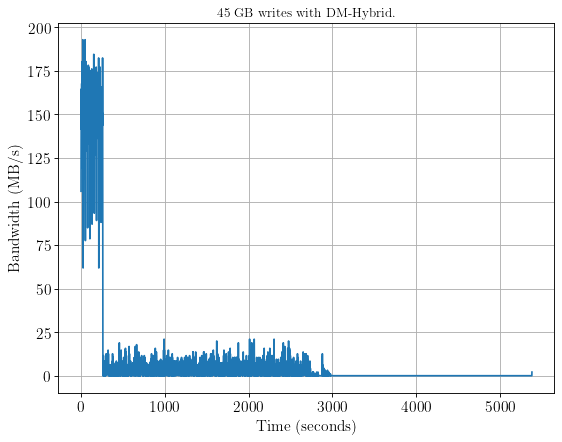

/tmp/ipykernel_87469/391510537.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_transferred_per_interval = df.groupby('time_bin')['write_size'].sum()


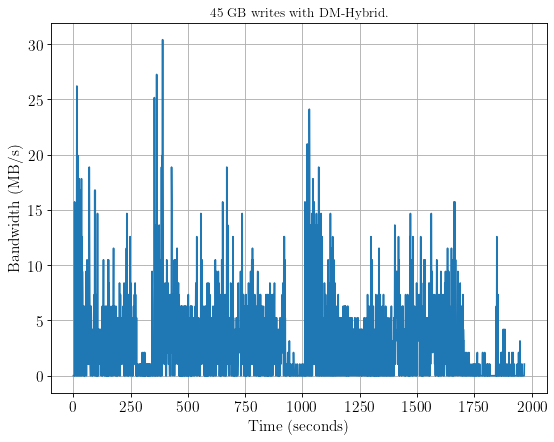

In [ ]:

# Read the CSV file
names_latency=['generation_time_sec', 'completion_time_ns', 'op2', 'write_size', 'op3']
dirs = ["25Util", "50Util", "90Util"]
runs = ["run1", "run2"]
for run in runs:
  df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/25Util/{run}/lat_log_avg_lat.1.log', names=names_latency)
  # Convert generation time from milliseconds to seconds
  
  df['generation_time_sec'] = df['generation_time_sec'] / 1000.0

  # Convert completion time from nanoseconds to seconds
  df['completion_time_sec'] = df['generation_time_sec'] + (df['completion_time_ns'] / 1e9)
  # Bin the data into 1-second intervals and calculate the total amount of data transferred in each interval
  df['time_bin'] = pd.cut(df['completion_time_sec'], bins=range(int(df['completion_time_sec'].max()) + 2), right=False)
  data_transferred_per_interval = df.groupby('time_bin')['write_size'].sum()

  # Calculate the instantaneous bandwidth for each interval (in MB/sec)
  bandwidth_per_interval = data_transferred_per_interval / 1e6  # Convert bytes to megabytes
  # bandwidth_per_interval /= 1  # Convert seconds to 1-second intervals

  # print(bandwidth_per_interval)

  # Plot the instantaneous bandwidth over time
  #get the interval edges and values
  x = bandwidth_per_interval.index
  y = bandwidth_per_interval.values

  #get right edge of the interval
  x = [i.right for i in x]

  plt.figure(figsize=(8, 6), dpi=80)
  plt.rc('text', usetex=True)
  plt.rc('font', family='serif')
  plt.rcParams['pdf.fonttype'] = 42
  plt.rcParams['ps.fonttype'] = 42

  plt.plot(x, y)
  # xticks = np.arange(0, math.ceil(max(x)), 50)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.xlabel('Time (seconds)', fontsize=14)
  plt.ylabel('Bandwidth (MB/s)', fontsize=14)

  plt.grid(True)  # Optionally, add grid lines
  plt.title("45 GB writes with DM-Hybrid.")
  #plt.savefig(f'fig/utilization/{dir}_{run}.pdf', bbox_inches='tight')
  plt.show()


/tmp/ipykernel_87469/2126813722.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_transferred_per_interval = df.groupby('time_bin')['write_size'].sum()


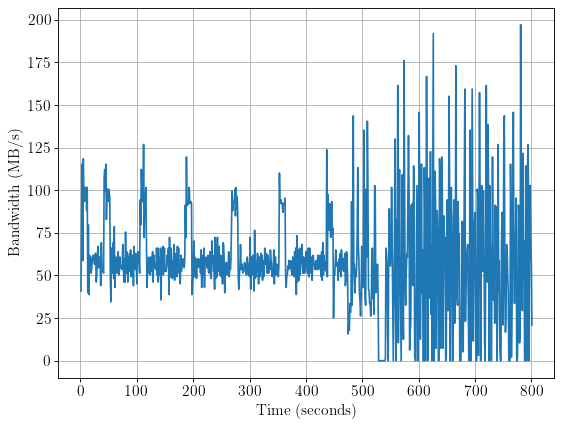

/tmp/ipykernel_87469/2126813722.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_transferred_per_interval = df.groupby('time_bin')['write_size'].sum()


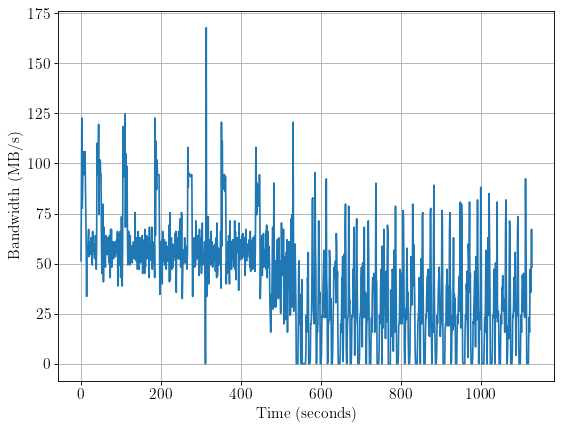

/tmp/ipykernel_87469/2126813722.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_transferred_per_interval = df.groupby('time_bin')['write_size'].sum()


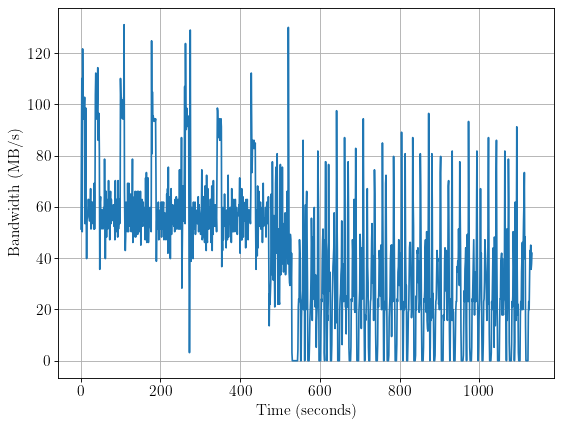

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
names_latency=['generation_time_sec', 'completion_time_ns', 'op2', 'write_size', 'op3']
dirs = ["25Util", "50Util", "90Util"]
runs = ["run1", "run2"]
for dir in dirs:
  #/home/surbhi/measurements/worst_case/lsdm/lsdm-util/25Util/1MB/8TB/90-10-LBA/45GB
  df = pd.read_csv(f'/home/surbhi/measurements/worst_case/lsdm/lsdm-util/{dir}/1MB/8TB/90-10-LBA/45GB/lat_log_avg_lat.1.log', names=names_latency)
  # Convert generation time from milliseconds to seconds
  df['generation_time_sec'] = df['generation_time_sec'] / 1000.0

  # Convert completion time from nanoseconds to seconds
  df['completion_time_sec'] = df['generation_time_sec'] + (df['completion_time_ns'] / 1e9)
  # Bin the data into 1-second intervals and calculate the total amount of data transferred in each interval
  df['time_bin'] = pd.cut(df['completion_time_sec'], bins=range(int(df['completion_time_sec'].max()) + 2), right=False)
  data_transferred_per_interval = df.groupby('time_bin')['write_size'].sum()

  # Calculate the instantaneous bandwidth for each interval (in MB/sec)
  bandwidth_per_interval = data_transferred_per_interval / 1e6  # Convert bytes to megabytes
  # bandwidth_per_interval /= 1  # Convert seconds to 1-second intervals

  # print(bandwidth_per_interval)

  # Plot the instantaneous bandwidth over time
  #get the interval edges and values
  x = bandwidth_per_interval.index
  y = bandwidth_per_interval.values

  #get right edge of the interval
  x = [i.right for i in x]

  plt.figure(figsize=(8, 6), dpi=80)
  plt.rc('text', usetex=True)
  plt.rc('font', family='serif')
  plt.rcParams['pdf.fonttype'] = 42
  plt.rcParams['ps.fonttype'] = 42

  plt.plot(x, y)
  # xticks = np.arange(0, math.ceil(max(x)), 50)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.xlabel('Time (seconds)', fontsize=14)
  plt.ylabel('Bandwidth (MB/s)', fontsize=14)

  plt.grid(True)  # Optionally, add grid lines
  #plt.savefig(f'fig/utilization/{dir}_{run}.pdf', bbox_inches='tight')
  plt.show()
